# SHAP

SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory and used to increase transparency and interpretability of machine learning models.

In [1]:
# !pip install shap

In [2]:
# first import requirement libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Optional
# for filter warning
from warnings import filterwarnings
filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/opt/conda/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

In [3]:
# import dataset 
df = pd.read_csv('../input/bank-loan-simple-dataset/example_dataset.csv')
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [4]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set

clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [5]:
# Fits the explainer
explainer = shap.Explainer(clf.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Exact explainer: 1001it [02:54,  5.53it/s]


## 1. Bar Plot

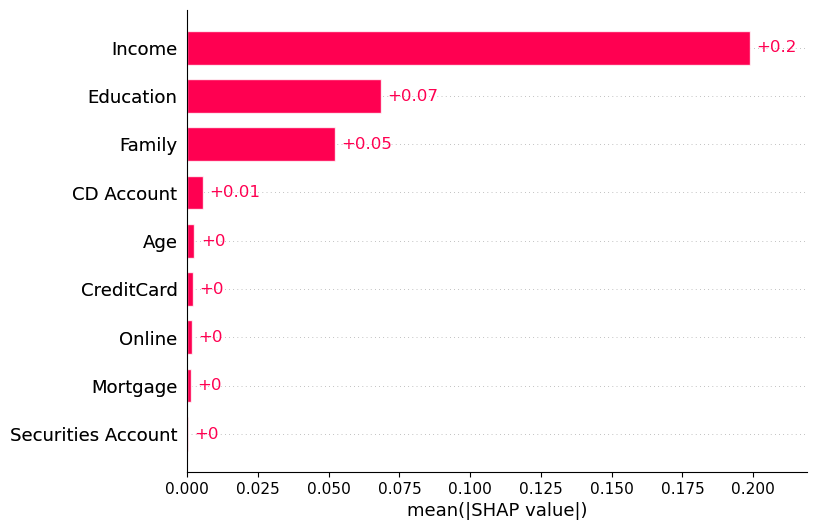

In [6]:
shap.plots.bar(shap_values)

## 2. Summary plot: beeswarm

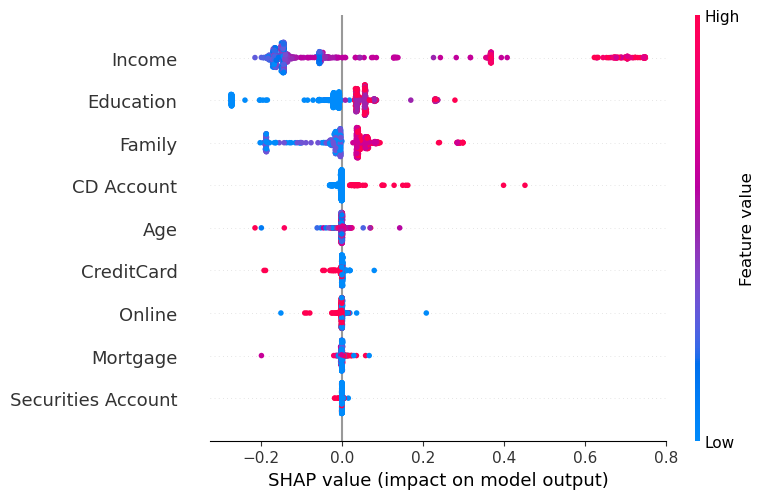

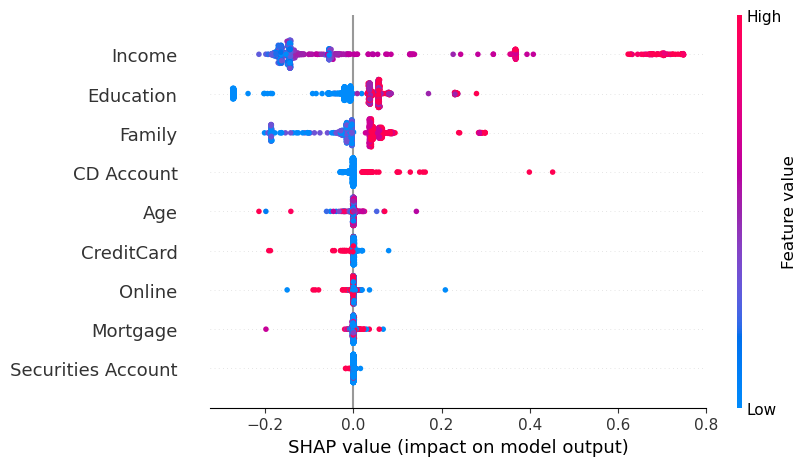

In [7]:
shap.summary_plot(shap_values)
# or 
shap.plots.beeswarm(shap_values)

## 3. Summary plot: violin

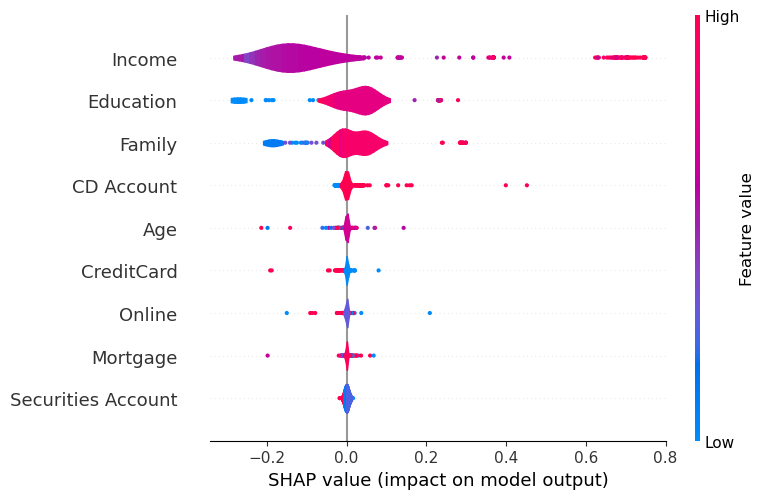

In [8]:
shap.summary_plot(shap_values, plot_type='violin')

## 4. Local bar plot

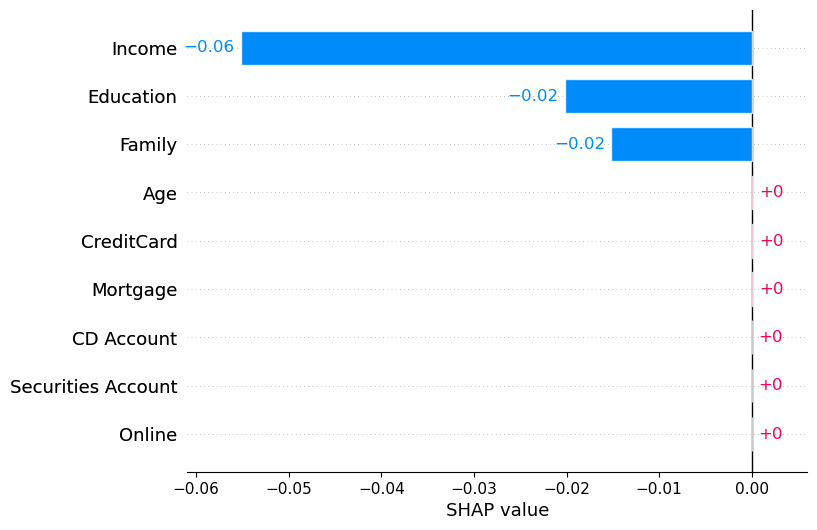

In [9]:
shap.plots.bar(shap_values[0])

## 5. Waterfall plot

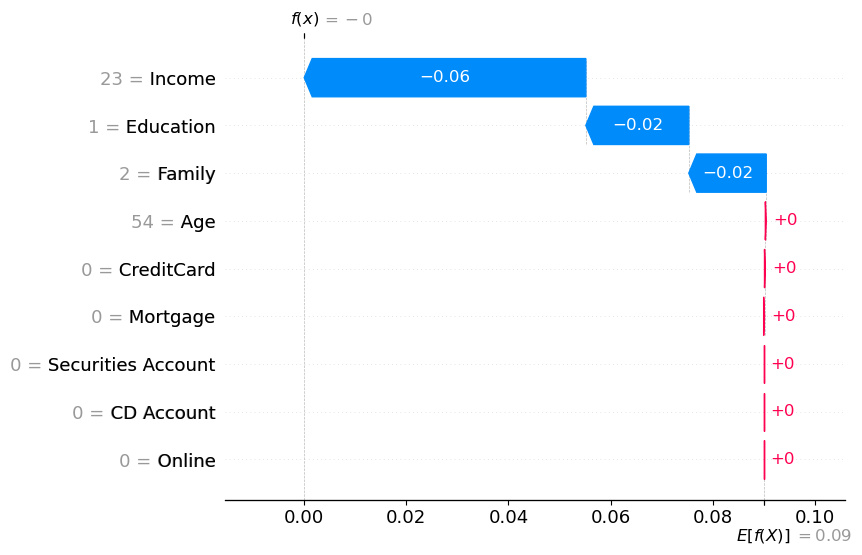

In [10]:
shap.plots.waterfall(shap_values[0])